# 가위바위보 분류기 만들기 



## 평가방식 

+ 이미지 분류기 모델이 성공적으로 만들어졌는가?  
+ 오버피팅을 극복하기 위한 적절한 시도가 있었는가? 
+ test accuracy 60%이상 


## steps

+ 데이터 준비 
+ 데이터 전처리(사이즈 변환)
+ 네트워크 설계 
+ 네트워크 학습
+ 네터워크 테스트
+ 다른 네트워크 시도 
+ 회고 


## 점수향상을 위한 시도

+ 분류모델에 좋은 efficientnet 사용해보기 
+ 데이터셋 추가 및 정규화

## 회고

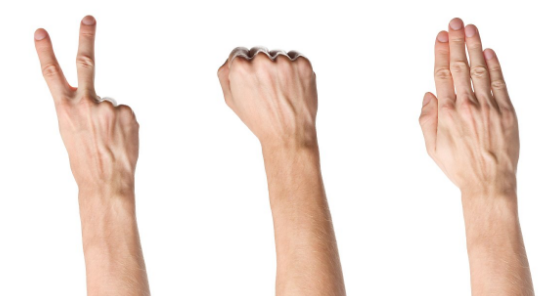

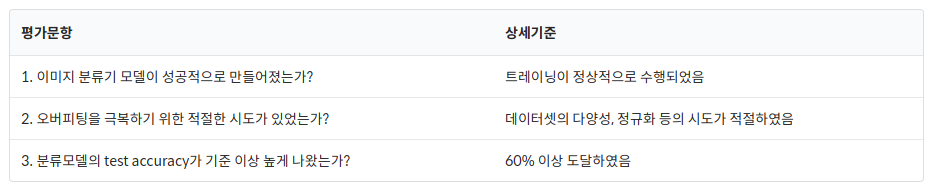

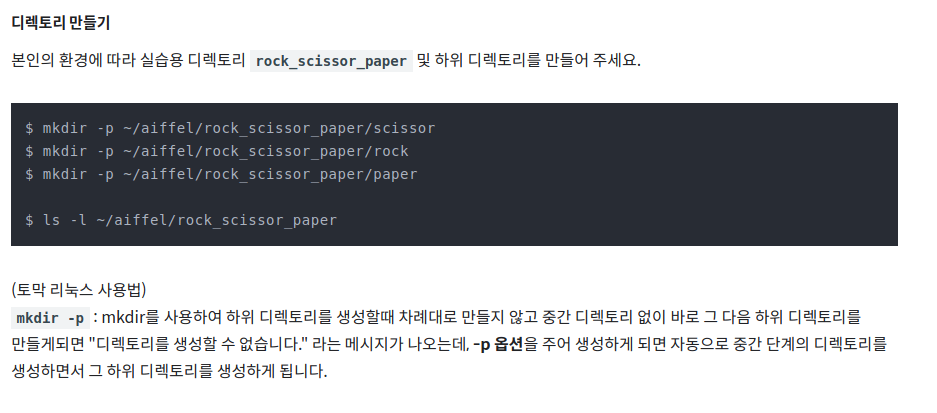

### 데이터 불러오기 + Resize하기 

mnist와 마찬가지로 가위바위보 이미지도 28 *28로 만든다.   
먼저 PIL 라이브러리가 없는 경우 아래 명령어를 통해 설치하자. 

In [1]:
#PIL 라이브러리가 설치되어 있지 않다면 설치 
! pip install pillow
! ls

'E_01 mnist분류기 .ipynb'			  Untitled.ipynb
'E_01_프로젝트 가위바위보 분류기 만들기 .ipynb'


In [2]:
import os
from PIL import Image 
import numpy as np
import matplotlib as mpl
import pandas as pd
import glob

In [3]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac11/aiffel/rock_scissor_paper/train/paper
보 이미지 resize 완료!


In [4]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac11/aiffel/rock_scissor_paper/train/rock
바위 이미지 resize 완료!


In [5]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/scissor"
images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

가위 이미지 resize 완료!


### 이미지 전처리하기 
+ 라벨링하기 

In [6]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=3300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels



In [7]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3300 입니다.
x_train shape: (3300, 28, 28, 3)
y_train shape: (3300,)


라벨:  1


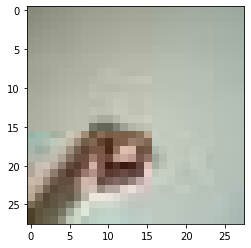

In [8]:
#이미지 확인하기 
import matplotlib.pyplot as plt
plt.imshow(x_train[2000])
print('라벨: ', y_train[2000])

### 딥러닝 네트워크 설계하기 

+ 딥러닝 네트워크 설계 
+ 모델 lenet 
+ keras local 설치 및 import하기 

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [10]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                204864    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train , epochs=10)

Epoch 1/10
104/104 [==============================] - 5s 47ms/step - loss: 1.0430 - accuracy: 0.4379
Epoch 2/10
104/104 [==============================] - 0s 2ms/step - loss: 0.7964 - accuracy: 0.6376
Epoch 3/10
104/104 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.8039
Epoch 4/10
104/104 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8761
Epoch 5/10
104/104 [==============================] - 0s 2ms/step - loss: 0.2439 - accuracy: 0.9155
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 0.1917 - accuracy: 0.9300
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 0.1360 - accuracy: 0.9548
Epoch 8/10
104/104 [==============================] - 0s 2ms/step - loss: 0.0998 - accuracy: 0.9709
Epoch 9/10
104/104 [==============================] - 0s 2ms/step - loss: 0.0795 - accuracy: 0.9779
Epoch 10/10
104/104 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.988

### 딥러닝 네트워크 학습시키기 

+ 딥러닝 네트워크의 입력은 (데이터갯수, 이미지크기x, 이미지크기y, 채널수)와 같이 4차원으로 나타낸다.   
+ 따라서 채널수를 맞춰줍니다. 

#### test data 불러오기 

이미지 데이터: rock, scissor, paper 각각 100장

In [13]:
def load_test(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels=np.zeros(number_of_data, dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    return imgs, labels

In [14]:
test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
print(test_image_dir_path)

# scissor
t_s_images=glob.glob(test_image_dir_path + "/scissor/*.jpg")  
target_size=(28,28)
for img in t_s_images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

# rock
t_r_images=glob.glob(test_image_dir_path + "/rock/*.jpg")  
target_size=(28,28)
for img in t_r_images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")
 
print("바위 이미지 resize 완료!")

# paper
t_p_images=glob.glob(test_image_dir_path + "/paper/*.jpg")  
target_size=(28,28)
for img in t_p_images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")
 
print("바위 이미지 resize 완료!")


(x_test, y_test)=load_test(test_image_dir_path)
x_test_norm = x_test/255.0

print(x_test.shape)

/home/ssac11/aiffel/rock_scissor_paper/test
가위 이미지 resize 완료!
바위 이미지 resize 완료!
바위 이미지 resize 완료!
(300, 28, 28, 3)


### Model Test하기 

In [15]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 2s - loss: 3.9341 - accuracy: 0.3733
test_loss: 3.934081554412842 
test_accuracy: 0.3733333349227905


### 점수향상을 위한 다른 시도 


1) 데이터를 늘린다. 

accuracy가 0.3밖에 되지 않는다. 


#### Model 바꾸기 
2) 모델을 바꾼다. 


 현재 캐글에서 이미지분류에 가장 많이 사용하고 있는 efficientnet을 사용해보았다.    
 finetunning을 위해 출력층을 날리고 Dense를 3으로 수정하였습니다.  
 
 **단점**  
 paramter 갯수가 400만개가 넘어서 모델이 학습하는데 시간이 너무 많이 소요됩니다.   
 overfitting됨. accuracy가 99.8로 문제발생. 
 
 module을 바꾸었다. tensorflow 최신버전으로 `pip install -upgrade tensorflow`   
 환경세팅이 너무 중요하다. 버전에 따른 사용하고자 하는 모듈이 달라지기 때문에 각각에 맞는 모듈을 꼭 찾아서 설치해줘야 한다. 



In [1]:
from PIL import Image
import os, glob
import pandas as pd


In [2]:
Image.open(os.getenv('HOME') + '/aiffel/rock_scissor_paper/train/trainreal/scissor.0.jpg')

In [3]:
train = pd.DataFrame({'path':glob.glob(os.getenv('HOME') + '/aiffel/rock_scissor_paper/train/trainreal/*')})

In [4]:
train['target'] = train['path'].apply(lambda x : x.split('/')[7].split('.')[0])
train

,path,target
0,/home/ssac11/aiffel/rock_scissor_paper/train/t...,paper
1,/home/ssac11/aiffel/rock_scissor_paper/train/t...,paper
2,/home/ssac11/aiffel/rock_scissor_paper/train/t...,scissor
3,/home/ssac11/aiffel/rock_scissor_paper/train/t...,paper
4,/home/ssac11/aiffel/rock_scissor_paper/train/t...,rock
...,...,...
3295,/home/ssac11/aiffel/rock_scissor_paper/train/t...,paper
3296,/home/ssac11/aiffel/rock_scissor_paper/train/t...,scissor
3297,/home/ssac11/aiffel/rock_scissor_paper/train/t...,paper
3298,/home/ssac11/aiffel/rock_scissor_paper/train/t...,paper


In [5]:
test = pd.DataFrame({'path':glob.glob(os.getenv('HOME') + '/aiffel/rock_scissor_paper/test/test_all/*')})
test

,path
0,/home/ssac11/aiffel/rock_scissor_paper/test/te...
1,/home/ssac11/aiffel/rock_scissor_paper/test/te...
2,/home/ssac11/aiffel/rock_scissor_paper/test/te...
3,/home/ssac11/aiffel/rock_scissor_paper/test/te...
4,/home/ssac11/aiffel/rock_scissor_paper/test/te...
...,...
297,/home/ssac11/aiffel/rock_scissor_paper/test/te...
298,/home/ssac11/aiffel/rock_scissor_paper/test/te...
299,/home/ssac11/aiffel/rock_scissor_paper/test/te...
300,/home/ssac11/aiffel/rock_scissor_paper/test/te...


##  train이미지를 분할 

#### validationset을 만들어 보았습니다.   
#### traindata와 유사하게 만들기 위해 옵션값을 20% 난수조정값과 stratify 3가지를 지정하였습니다. 

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_valid = train_test_split(train,test_size=0.2, random_state=42, stratify=train['target'])
x_valid

x_train['target'].value_counts()
train['target'].value_counts()

paper      1100
rock       1100
scissor    1100
Name: target, dtype: int64

## Image전처리 

keras의 모듈인 imagedatagenerator를 활용하여 각각의 데이터셋 전처리를 진행하였습니다. 

In [7]:
from keras.preprocessing.image import ImageDataGenerator
idg = ImageDataGenerator()
train_generator = idg.flow_from_dataframe(x_train, x_col ='path', y_col = 'target',target_size=(100,100))
valid_generator = idg.flow_from_dataframe(x_valid, x_col='path', y_col='target', target_size=(100,100))
test_generator = idg.flow_from_dataframe(test, x_col='path', y_col=None, target_size=(100,100), class_mode=None)

Found 2640 validated image filenames belonging to 3 classes.
Found 660 validated image filenames belonging to 3 classes.
Found 302 validated image filenames.


## MODEL 불러오기 

#### 모델을 불러와서 제 데이터에 맞게 출력층을 세팅하였습니다.  

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.applications import EfficientNetB0

In [10]:
eb0 = EfficientNetB0(include_top=False, pooling='avg')
eb0.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, None, None, 3 7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization_1[0][0]            
_____________________________________________________________________________________

In [11]:
model = Sequential()
model.add(eb0)
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 1280)              4049571   
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________


In [13]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.fit(train_generator)

83/83 [==============================] - 49s 517ms/step - loss: 0.5194 - accuracy: 0.7703


In [14]:
result = model.predict(test_generator, verbose=1)

10/10 [==============================] - 2s 99ms/step


In [16]:
result = pd.DataFrame(result, columns=train['target'].unique())#특정 칼럼에 접근해서 과연 거기에 유니크한 종류가 어떻게 들어있는지 확인합니다. 

In [17]:
result

,paper,scissor,rock
0,0.109224,0.724796,0.165980
1,0.063611,0.933213,0.003177
2,0.004257,0.007415,0.988328
3,0.081836,0.909692,0.008472
4,0.001154,0.997215,0.001631
...,...,...,...
297,0.061111,0.036306,0.902583
298,0.198006,0.659845,0.142149
299,0.003664,0.015449,0.980887
300,0.056613,0.034100,0.909287


## 회고

### 데이터 

학습시 데이터의 양이 중요합니다. 300장이던 데이터는 test로 바꾸고   
사람들이 준 데이터를 모아서 학습시키니 accuracy가 높아졌습니다.  


### 전처리 

train데이터에서 validation set을 만들어 보았습니다. 

### Model
하지만 현재 이미지 데이터의 양이 한계가 있어서 모델을 변경하여 보았습니다.  
기존 알고리즘은 lenet을 기반으로 하였지만 efficientnet 중 Eb0모델을 사용하였습니다. 


### 소감 

띄어쓰기 하나, 괄호 하나에도 세심한 주의를 기울여야 합니다. 옵션값을 어떻게 세팅하느냐에 따라   
데이터의 정확도가 많이 달라질 수 있습니다.  rock,scissor, paper의 위치를 변경했더니 이미지 차원이 변경되지 않아서  
엄청 애를 먹었다. 그리고 tensorflow 버전을 업그레이드 했고, kernel을 끊고 restart를 눌렀지만 작동하지 않았다.  
하지만 왜

#### 다음에 더 발전시킨다면?  

데이터!!! 데이터를 많이 수집하겠습니다. 딥러닝은 데이터 싸움이라는 것을 다시 한번 느꼈습니다. 